In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from s3fs import S3FileSystem, S3Map

import cmocean as cm

/opt/tljh/user/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
plt.rcParams['font.size']=14
plt.rcParams['axes.labelsize']='large'
plt.rcParams['pcolor.shading']='auto'

In [91]:
sitename='N280'
ds = xr.open_dataset('/home/jupyter-ubuntu/data/SWOT_Cruise/FV02/stacked_moorings_adcp/[BB23]_[BB23_REC]_[N280]_[5]_[Longranger]_[24613]_[no_outfile_append].nc')

# sitename='W310'
# ds = xr.open_dataset('/home/jupyter-ubuntu/data/SWOT_Cruise/FV02/stacked_moorings_adcp/[BB23]_[BB23_REC]_[W310]_[multi(2)_nominal_instrument_height_asb]_[multi(2)_instrument_model]_[multi(2)_instrument_serial_number]_[no_outfile_append].nc')

sitename = 'S245'
ds = xr.open_dataset('/home/jupyter-ubuntu/data/SWOT_Cruise/FV02/stacked_moorings_adcp/[BB23]_[BB23_REC]_[S245]_[5]_[Quartermaster]_[11795]_[no_outfile_append].nc')
ds

<xarray.Dataset>
Dimensions:     (prof_z_nom: 44, time: 61920)
Coordinates:
  * prof_z_nom  (prof_z_nom) float64 -229.6 -224.6 -219.6 ... -19.56 -14.56
  * time        (time) datetime64[ns] 2023-04-19T00:00:00.809999942 ... 2023-...
    lat_nom     float64 ...
    lon_nom     float64 ...
    z_nom       object ...
Data variables:
    u           (prof_z_nom, time) float64 ...
    v           (prof_z_nom, time) float64 ...
    w           (prof_z_nom, time) float64 ...
    source      (prof_z_nom) object ...
Attributes: (12/35)
    title:                           Mooring made by stacking multipe files
    institution:                     The University of Western Australia
    institution_division:            Ocean Dynamics
    source:                          D:\BB23(All)\data\moored_instrument_data...
    project:                         BB23
    history:                         
    ...                              ...
    nominal_instrument_height_asb:   5.915
    nominal_instrument_orientation:  
    timezone:                        UTC
    process_level:                   2
    is_profile_data:                 0
    pimos_nickname:                  stacked_moorings_adcp

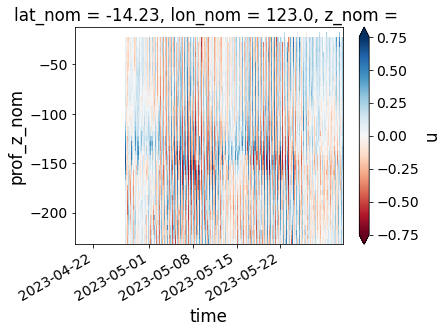

In [92]:
plt.figure()
ds['u'].plot(cmap='RdBu', vmin=-0.75, vmax=0.75)

In [93]:
ds150 = ds.sel(prof_z_nom=-150, method='nearest').fillna(0.)

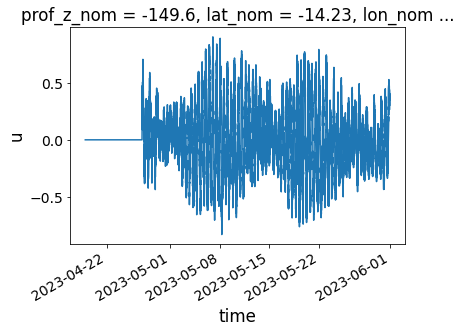

In [94]:
ds150['u'].plot()

In [95]:
from utils import filt_decompose

In [96]:
time = ds.time.values
dt = (time[1:]-time[:-1]).mean()
dtsec = dt.astype(float)*1e-9

In [97]:
uf = filt_decompose(ds150['u'], dtsec)
vf = filt_decompose(ds150['v'], dtsec)

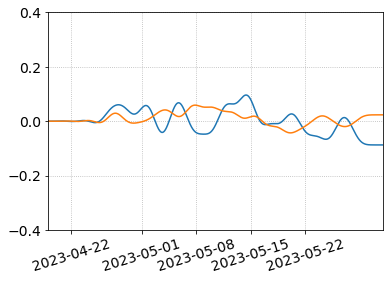

In [98]:
plt.figure()
ax=plt.subplot(111)
ax.plot(time, uf[:,0])
ax.plot(time, vf[:,0])
plt.xticks(rotation=17)
plt.ylim(-0.4,0.4)
plt.xlim(time[0],time[-1])
plt.grid(b=True, ls=':')

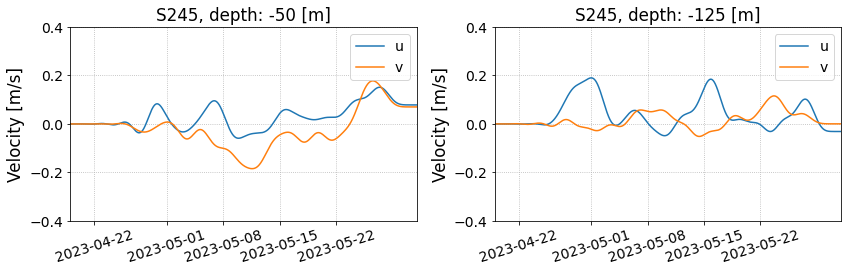

In [100]:
def plot_lowfreq_uv(ds, zlayer, ax):
    ds150 = ds.sel(prof_z_nom=zlayer, method='nearest').fillna(0.)
    time = ds.time.values
    dt = (time[1:]-time[:-1]).mean()
    dtsec = dt.astype(float)*1e-9
    
    uf = filt_decompose(ds150['u'], dtsec)
    vf = filt_decompose(ds150['v'], dtsec)


    ax.plot(time, uf[:,0])
    ax.plot(time, vf[:,0])
    plt.xticks(rotation=17)
    plt.ylim(-0.4,0.4)
    plt.xlim(time[0],time[-1])
    plt.grid(b=True, ls=':')
    plt.legend(('u','v'))
    plt.title(sitename+', depth: '+str(zlayer)+' [m]')
    plt.ylabel('Velocity [m/s]')
    
plt.figure(figsize=(12,4))
ax=plt.subplot(121)
plot_lowfreq_uv(ds, -50, ax)
ax2=plt.subplot(122)

plot_lowfreq_uv(ds, -125,ax2)
plt.tight_layout()
plt.savefig('../FIGURES/ADCP_{}_lowfreq_uv.png'.format(sitename), dpi=150)